# Linear Discriminant Analysis, mesmo tamanho de vocabulário

In [1]:
import pandas as pd

df = pd.read_csv('selecionada_comparacao.txt', sep = '|', encoding = 'utf-8')
df.head(20)

,COD,NUM_ENUNCIADO,DESCR_AREA,PREPROC_ENUNCIADO,PREPROC_EXCERTO,COD_JURISPRUDENCIA,NUM,ANO,COD_COLEGIADO,PREPROC_INTEIRO_TEOR
0,1400,1236,Responsabilidade,comprovada participação beneficiário concessão...,votocuidam auto tomada conta especi instaurada...,1400,297.0,2016.0,P,tribun conta união tc 010084/2015-0 grupo ii -...
1,1700,1534,Finanças Públicas,operação ficta exportação plataforma petróleo ...,votocuidam auto solicitação congresso nacion r...,1700,366.0,2016.0,P,tribun conta união tc 005933/2014-5 grupo i - ...
2,5700,5314,Responsabilidade,âmbito tcu dosimetria pena balizador nível gra...,relatóriotrata-s embargo declaração oposto rec...,5700,944.0,2016.0,P,tribun conta união tc 042038/2012-0 grupo ii -...
3,284,40,Direito Processual,princípio independência instância permit tcu a...,voto8 relação outro processo judiciai tratam i...,284,30.0,2016.0,P,tribun conta união tc 000742/2014-7 grupo ii -...
4,298,54,Pessoal,é vedado dirigent entidad sistema s nomeação c...,voto11 relativament ato envolvendo sra cabe re...,298,55.0,2016.0,P,tribun conta união tc 013174/2012-6 grupo i - ...
5,299,55,Licitação,é irregular contratação emergenci dispensa lic...,voto2 present apelo têm objetivo contestar rej...,299,27.0,2016.0,P,tribun conta união tc 004063/2008-4 grupo i - ...
6,310,66,Pessoal,aplicação princípio segurança jurídica fin man...,votoexamina-s ato aposentadoria concedida âmbi...,310,38.0,2016.0,P,tribun conta união tc 005231/2012-4 grupo i - ...
7,364,120,Pessoal,redução provento aposentadoria concedida desac...,votoexamina-s ato aposentadoria concedida âmbi...,364,38.0,2016.0,P,tribun conta união tc 005231/2012-4 grupo i - ...
8,432,168,Licitação,indicação marca edit deve estar amparada razõ ...,vototrata-s representação formulada empresa re...,432,113.0,2016.0,P,tribun conta união tc 031921/2015-9 grupo i - ...
9,449,185,Licitação,permite-s menção marca referência edit forma p...,vototrata-s representação formulada empresa re...,449,113.0,2016.0,P,tribun conta união tc 031921/2015-9 grupo i - ...


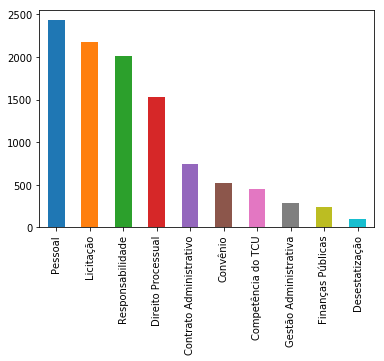

In [3]:
import matplotlib.pyplot as plt

# Mostra gráfico de barras ilustando a distribuição da dimensão "Área" entre as 17 áreas existentes
df['DESCR_AREA'].value_counts().plot(kind='bar')
plt.show()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

textos_enunciados = df['PREPROC_ENUNCIADO'].values
textos_excertos = df['PREPROC_EXCERTO'].values
textos_acordaos = df['PREPROC_INTEIRO_TEOR'].values

def vetorizar(textos, nr_dimensoes):
    vetorizador = TfidfVectorizer(max_features=nr_dimensoes)
    vetorizador.fit(textos)
    return vetorizador.transform(textos)

MAX_FEATURES = 8000

textos_enunciados_bow = vetorizar(textos_enunciados, MAX_FEATURES)
textos_excertos_bow = vetorizar(textos_excertos, MAX_FEATURES)
textos_acordaos_bow = vetorizar(textos_acordaos, MAX_FEATURES)

print(textos_enunciados_bow.shape)
print(textos_excertos_bow.shape)
print(textos_acordaos_bow.shape)

(10486, 8000)
(10486, 8000)
(10486, 8000)


In [6]:
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score
import warnings

warnings.filterwarnings('ignore')

kf = KFold(n_splits=10, random_state=42, shuffle=True)
f = 0

f1_macro_enunciados = []
f1_micro_enunciados = []
f1_weighted_enunciados = []
f1_classes_enunciados = []
f1_macro_excertos = []
f1_micro_excertos = []
f1_weighted_excertos = []
f1_classes_excertos = []
f1_macro_acordaos = []
f1_micro_acordaos = []
f1_weighted_acordaos = []
f1_classes_acordaos = []

for indice_treino, indice_teste in kf.split(df):
    
    df_treino = df.loc[indice_treino]
    df_teste = df.loc[indice_teste]
    
    textos_treino_enunciado = df_treino['PREPROC_ENUNCIADO'].values
    textos_teste_enunciado = df_teste['PREPROC_ENUNCIADO'].values
    textos_treino_excerto = df_treino['PREPROC_EXCERTO'].values
    textos_teste_excerto = df_teste['PREPROC_EXCERTO'].values
    textos_treino_acordao = df_treino['PREPROC_INTEIRO_TEOR'].values
    textos_teste_acordao = df_teste['PREPROC_INTEIRO_TEOR'].values
    
    textos_treino_enunciados_bow = textos_enunciados_bow[indice_treino]
    textos_teste_enunciados_bow = textos_enunciados_bow[indice_teste]
    textos_treino_excertos_bow = textos_excertos_bow[indice_treino]
    textos_teste_excertos_bow = textos_excertos_bow[indice_teste]
    textos_treino_acordaos_bow = textos_acordaos_bow[indice_treino]
    textos_teste_acordaos_bow = textos_acordaos_bow[indice_teste]
    

    print('Fold', f+1)

    print('\tTraining model (enunciados)...')
    ldam = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')
    ldam.fit(textos_treino_enunciados_bow.toarray(), df_treino['DESCR_AREA'])
    ps = ldam.predict(textos_teste_enunciados_bow.toarray())
    
    f1_macro_enunciados.append(f1_score(df_teste['DESCR_AREA'], ps, average='macro'))
    f1_micro_enunciados.append(f1_score(df_teste['DESCR_AREA'], ps, average='micro'))
    f1_weighted_enunciados.append(f1_score(df_teste['DESCR_AREA'], ps, average='weighted'))
    f1_classes_enunciados.append(f1_score(df_teste['DESCR_AREA'], ps, average=None))

    print('\tTraining model (excertos)...')
    ldam = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')
    ldam.fit(textos_treino_excertos_bow.toarray(), df_treino['DESCR_AREA'])
    ps = ldam.predict(textos_teste_excertos_bow.toarray())
    
    f1_macro_excertos.append(f1_score(df_teste['DESCR_AREA'], ps, average='macro'))
    f1_micro_excertos.append(f1_score(df_teste['DESCR_AREA'], ps, average='micro'))
    f1_weighted_excertos.append(f1_score(df_teste['DESCR_AREA'], ps, average='weighted'))
    f1_classes_excertos.append(f1_score(df_teste['DESCR_AREA'], ps, average=None))

    print('\tTraining model (acordaos)...')
    ldam = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')
    ldam.fit(textos_treino_acordaos_bow.toarray(), df_treino['DESCR_AREA'])
    ps = ldam.predict(textos_teste_acordaos_bow.toarray())
    
    f1_macro_acordaos.append(f1_score(df_teste['DESCR_AREA'], ps, average='macro'))
    f1_micro_acordaos.append(f1_score(df_teste['DESCR_AREA'], ps, average='micro'))
    f1_weighted_acordaos.append(f1_score(df_teste['DESCR_AREA'], ps, average='weighted'))
    f1_classes_acordaos.append(f1_score(df_teste['DESCR_AREA'], ps, average=None))

    f+=1

print('Fim')

Fold 1
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fold 2
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fold 3
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fold 4
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fold 5
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fold 6
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fold 7
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fold 8
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fold 9
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fold 10
	Training model (enunciados)...
	Training model (excertos)...
	Training model (acordaos)...
Fim


In [8]:
import numpy as np

def percorre(lista1, lista2, lista3):
    for fold in range(kf.n_splits):
        print(fold+1, '\t', lista1[fold], '\t', lista2[fold], '\t', lista3[fold])
    print('média\t', np.mean(lista1), '\t', np.mean(lista2), '\t', np.mean(lista3))
    print('desvio', np.std(lista1), '\t', np.std(lista2), '\t', np.std(lista3))
        
def percorre2(lista1, lista2, lista3):
    for classe in range(len(ldam.classes_)):
        lt1 = []
        lt2 = []
        lt3 = []
        print('"' + ldam.classes_[classe] + '"  enunciados\t   excertos\t\t   acordaos')
        for fold in range(kf.n_splits):
            print(fold+1, '  ', lista1[fold][classe], '\t', lista2[fold][classe], '\t', lista3[fold][classe])
            lt1.append(lista1[fold][classe])
            lt2.append(lista2[fold][classe])
            lt3.append(lista3[fold][classe])
        print('média\t', np.mean(lt1), '\t', np.mean(lt2), '\t', np.mean(lt3))
        print('desvio', np.std(lt1), '\t', np.std(lt2), '\t', np.std(lt3))
    print()

        

print('f1_macro\t enunciados\t\t   excertos\t\t   acordaos')
percorre(f1_macro_enunciados, f1_macro_excertos, f1_macro_acordaos)
print()
print('f1_micro\t enunciados\t\t   excertos\t\t   acordaos')
percorre(f1_micro_enunciados, f1_micro_excertos, f1_micro_acordaos)
print()
print('f1_weighted\t enunciados\t\t   excertos\t\t   acordaos')
percorre(f1_weighted_enunciados, f1_weighted_excertos, f1_weighted_acordaos)
print()
print()
print('f1_classes:')
print()
percorre2(f1_classes_enunciados, f1_classes_excertos, f1_classes_acordaos)

f1_macro	 enunciados		   excertos		   acordaos
1 	 0.6176871073402451 	 0.7458516388123967 	 0.59457026890879
2 	 0.5974839157493634 	 0.734087148591857 	 0.567473807955289
3 	 0.6117401187745019 	 0.7437834195402409 	 0.5895791779079839
4 	 0.6292359290748052 	 0.7635201301444096 	 0.5255770292580316
5 	 0.5632681102364241 	 0.7031960099205117 	 0.5298045270378217
6 	 0.5613165151804568 	 0.7379599342101255 	 0.585953363206911
7 	 0.5832552134701232 	 0.7022670514364246 	 0.5381575652142031
8 	 0.5792907149527678 	 0.7381984402521935 	 0.5833705279840997
9 	 0.5541186730139757 	 0.7313039214711379 	 0.5344041808470065
10 	 0.627232003122162 	 0.7498897443872948 	 0.5730683382988324
média	 0.5924628300914827 	 0.7350057438766593 	 0.5621958786618968
desvio 0.026730561774791408 	 0.01829326033430972 	 0.025878863491289116

f1_micro	 enunciados		   excertos		   acordaos
1 	 0.7149666348903717 	 0.8036224976167778 	 0.652049571020019
2 	 0.7082936129647283 	 0.8112488083889419 	 0.6358436